In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_csv(path):

    df = pd.read_csv(path)
    df["time"] = pd.to_datetime(df["time"])
    return df.set_index("time")

bunbury = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/bunbury.csv")
gipps = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/gipps.csv")
illawara = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/illawara.csv")
newcastle = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/newcastle.csv")
sa = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/sa.csv")
southern = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/southern.csv")
tas = read_csv("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/sb_days/tas.csv")

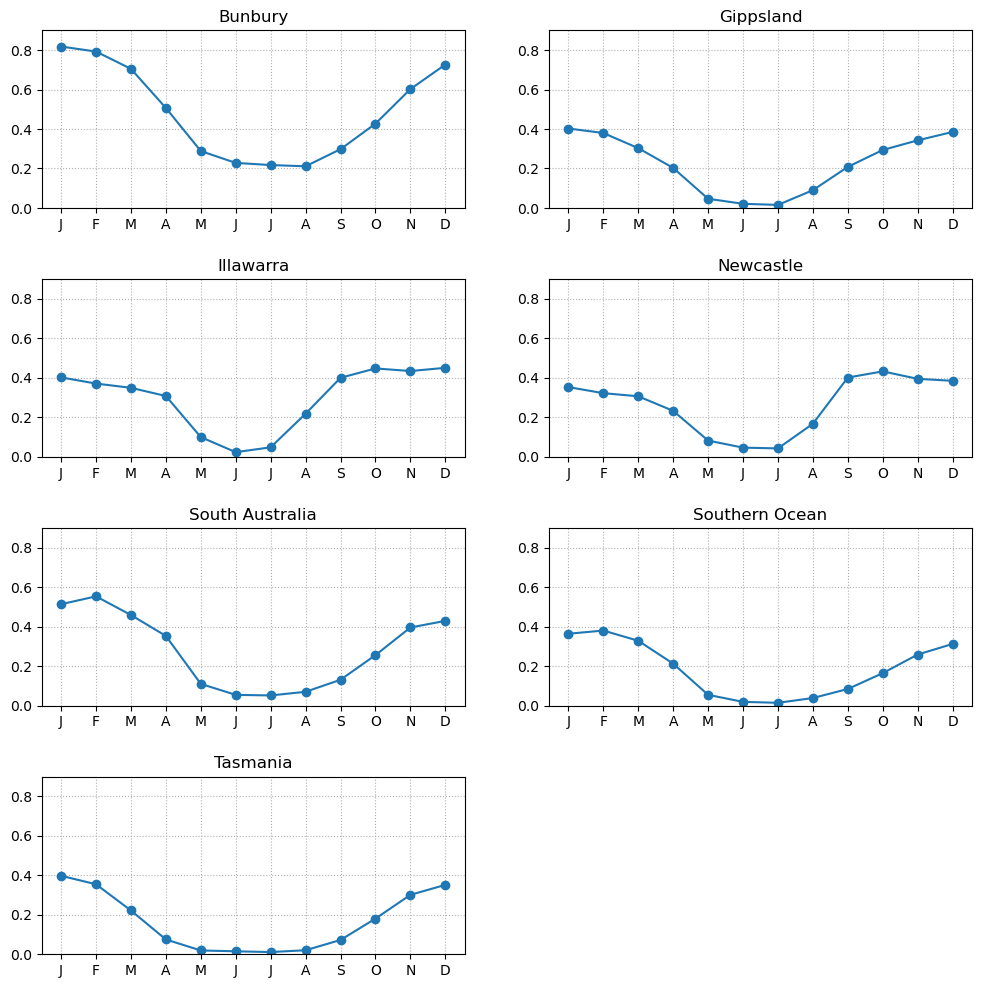

In [4]:
def plot(ax,df,title):

    (df[df["sb"]==1].index.month.value_counts().sort_index() / \
         df.index.month.value_counts().sort_index()).plot(marker="o")
    ax.set_ylim([0,0.9])
    ax.set_title(title)
    ax.grid(ls=":")
    ax.set_xlabel("")
    ax.set_xticks(np.arange(1,13),["J","F","M","A","M","J","J","A","S","O","N","D"])

plt.figure(figsize=[12,12])
plot(plt.subplot(4,2,1),bunbury,"Bunbury")
plot(plt.subplot(4,2,2),gipps,"Gippsland")
plot(plt.subplot(4,2,3),illawara,"Illawarra")
plot(plt.subplot(4,2,4),newcastle,"Newcastle")
plot(plt.subplot(4,2,5),sa,"South Australia")
plot(plt.subplot(4,2,6),southern,"Southern Ocean")
plot(plt.subplot(4,2,7),tas,"Tasmania")
    
plt.subplots_adjust(hspace=0.4)

In [5]:
# import glob
# import tqdm

# def load_land_sea_temp(region):
# #region="gipps"
#     files = np.sort(glob.glob("/scratch/ng72/ab4502/land_sea_temp_diff/land_ocean_tas_"+region+"*.csv"))
    
#     land_sea_diff = pd.concat([pd.read_csv(f) for f in tqdm.tqdm(files)],axis=0)
#     land_sea_diff["time"] = pd.to_datetime(land_sea_diff["time"])
#     land_sea_diff = land_sea_diff.set_index("time")

#     daily_max = (land_sea_diff["land_tas"] - land_sea_diff["ocean_tas"]).groupby(land_sea_diff.index.date).max()

#     return daily_max

# land_sea_diff_bunbury = load_land_sea_temp("bunbury")
# land_sea_diff_gipps = load_land_sea_temp("gipps")
# land_sea_diff_illawara = load_land_sea_temp("illawara")
# land_sea_diff_newcastle = load_land_sea_temp("newcastle")
# land_sea_diff_sa = load_land_sea_temp("sa")
# land_sea_diff_southern = load_land_sea_temp("southern")
# land_sea_diff_tas = load_land_sea_temp("tas")

In [6]:
# land_sea_diff_bunbury.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/bunbury.csv")
# land_sea_diff_gipps.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/gipps.csv")
# land_sea_diff_illawara.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/illawara.csv")
# land_sea_diff_newcastle.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/newcastle.csv")
# land_sea_diff_sa.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/sa.csv")
# land_sea_diff_southern.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/southern.csv")
# land_sea_diff_tas.to_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/tas.csv")

land_sea_diff_bunbury = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/bunbury.csv",index_col=0)
land_sea_diff_gipps = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/gipps.csv",index_col=0)
land_sea_diff_illawara = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/illawara.csv",index_col=0)
land_sea_diff_newcastle = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/newcastle.csv",index_col=0)
land_sea_diff_sa = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/sa.csv",index_col=0)
land_sea_diff_southern = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/southern.csv",index_col=0)
land_sea_diff_tas = pd.read_csv("/g/data/ng72/ab4502/coastline_data/land_sea_temp_diff_barra_c_rez/tas.csv",index_col=0)

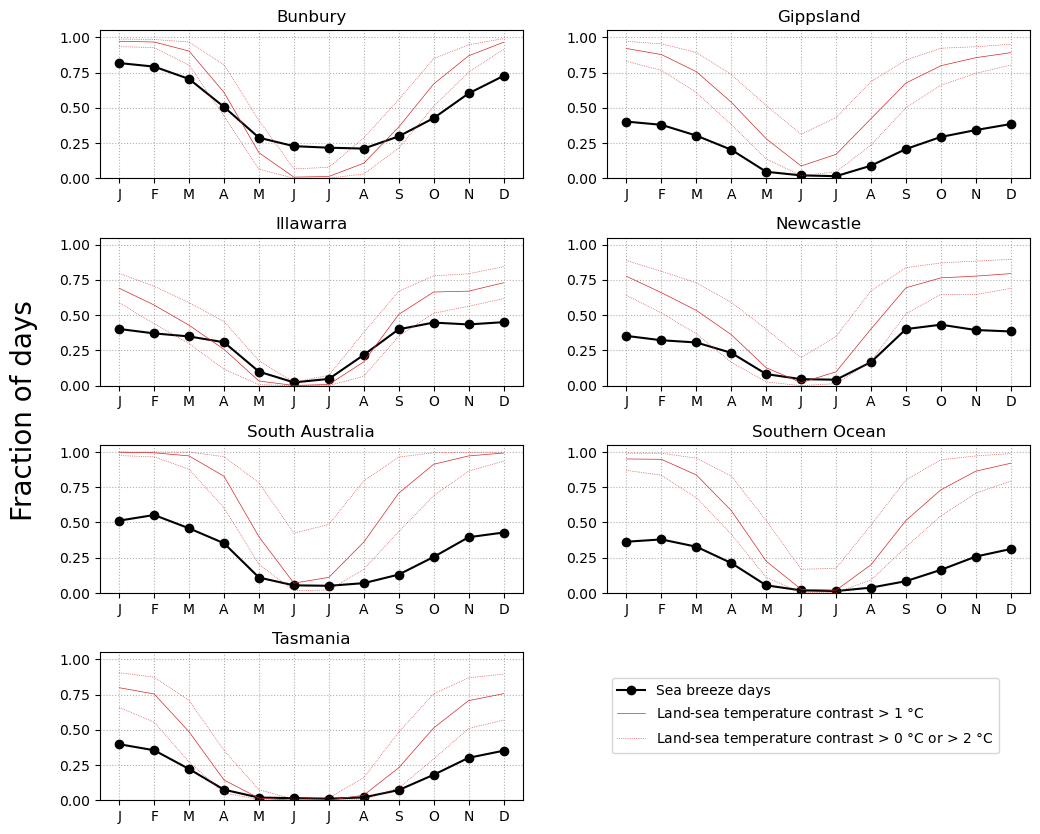

In [7]:
def plot(ax,df,df2,title):

    l1=(df[df["sb"]==1].index.month.value_counts().sort_index() / \
         df.index.month.value_counts().sort_index()).plot(color="k",marker="o",ax=ax,legend=False)

    l2=(df2 > 0).groupby(pd.to_datetime(df2.index).month).mean().plot(color="tab:red",lw=0.5,ls=":",ax=ax,legend=False)
    l3=(df2 > 1).groupby(pd.to_datetime(df2.index).month).mean().plot(color="tab:red",lw=0.5,ls="-",ax=ax,legend=False)
    l4=(df2 > 2).groupby(pd.to_datetime(df2.index).month).mean().plot(color="tab:red",lw=0.5,ls=":",ax=ax,legend=False)
    ax.set_ylim([0,1.05])
    
    #ax.set_ylim([0,0.9])
    ax.set_title(title)
    ax.grid(ls=":")
    ax.set_xlabel("")
    ax.set_xticks(np.arange(1,13),["J","F","M","A","M","J","J","A","S","O","N","D"])

    #ax2 = ax.twinx()
    #df2.groupby(pd.to_datetime(df2.index).month).mean().plot(ax=ax2,color="tab:red",lw=0.5)
    #ax2.set_ylim([-2.5,8.5])

    return l1,l2,l3,l4

    
    

fig=plt.figure(figsize=[12,10])
plot(plt.subplot(4,2,1),bunbury,land_sea_diff_bunbury,"Bunbury")
plot(plt.subplot(4,2,2),gipps,land_sea_diff_gipps,"Gippsland")
plot(plt.subplot(4,2,3),illawara,land_sea_diff_illawara,"Illawarra")
plot(plt.subplot(4,2,4),newcastle,land_sea_diff_newcastle,"Newcastle")
plot(plt.subplot(4,2,5),sa,land_sea_diff_sa,"South Australia")
plot(plt.subplot(4,2,6),southern,land_sea_diff_southern,"Southern Ocean")
l1,l2,l3,l4=plot(plt.subplot(4,2,7),tas,land_sea_diff_tas,"Tasmania")

fig.text(0.05,0.5,"Fraction of days",rotation=90,size=20,va="center")

plt.subplots_adjust(hspace=0.4)

fig.legend([l1.lines[0],l1.lines[2] ,l1.lines[1]],
           ["Sea breeze days","Land-sea temperature contrast > 1 $\degree$C","Land-sea temperature contrast > 0 $\degree$C or > 2 $\degree$C"],
           loc="lower right", bbox_to_anchor=[0.88,0.15])


In [7]:
combined_df = pd.concat([
    bunbury.rename(columns={"sb":"Bunbury"}),
    gipps.rename(columns={"sb":"Gippsland"}),
    illawara.rename(columns={"sb":"Illawarra"}),
    newcastle.rename(columns={"sb":"Newcastle"}),
    sa.rename(columns={"sb":"South Australia"}),
    southern.rename(columns={"sb":"Southern Ocean"}),
    tas.rename(columns={"sb":"Tasmania"}),
],axis=1).loc[slice("1979-01-01","2024-12-31")]

<Axes: >

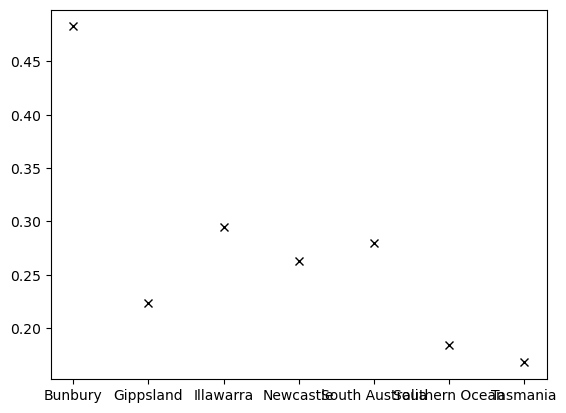

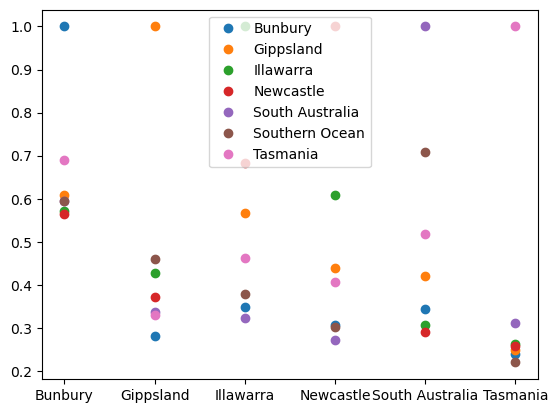

In [8]:
#combined_df.query("Bunbury==1").mean()


def corr_total(combined_df,region1,region2):

    return combined_df[combined_df[region2]==1].mean()[region1]


bunbury_freq_ann = pd.DataFrame(np.array([corr_total(combined_df,"Bunbury",r) for r in combined_df.columns]),index=combined_df.columns,columns=["Bunbury"]).T
gipps_freq_ann = pd.DataFrame(np.array([corr_total(combined_df,"Gippsland",r) for r in combined_df.columns]),index=combined_df.columns,columns=["Gippsland"]).T
illawarra_freq_ann = pd.DataFrame(np.array([corr_total(combined_df,"Illawarra",r) for r in combined_df.columns]),index=combined_df.columns,columns=["Illawarra"]).T
newcastle_freq_ann = pd.DataFrame(np.array([corr_total(combined_df,"Newcastle",r) for r in combined_df.columns]),index=combined_df.columns,columns=["Newcastle"]).T
sa_freq_ann = pd.DataFrame(np.array([corr_total(combined_df,"South Australia",r) for r in combined_df.columns]),index=combined_df.columns,columns=["South Australia"]).T
tas_freq_ann = pd.DataFrame(np.array([corr_total(combined_df,"Tasmania",r) for r in combined_df.columns]),index=combined_df.columns,columns=["Tasmania"]).T


combined_df.mean().plot(marker="x",color="k",ls="none")

pd.concat([
    bunbury_freq_ann,
    gipps_freq_ann,
    illawarra_freq_ann,
    newcastle_freq_ann,
    sa_freq_ann,
    tas_freq_ann],axis=0).plot(marker="o",ls="none")



In [9]:
combined_df.mean()

Bunbury            0.482720
Gippsland          0.223441
Illawarra          0.295170
Newcastle          0.263007
South Australia    0.279301
Southern Ocean     0.184461
Tasmania           0.167741
dtype: float64

In [10]:
pd.concat([
    bunbury_freq_ann,
    gipps_freq_ann,
    illawarra_freq_ann,
    newcastle_freq_ann,
    sa_freq_ann,
    tas_freq_ann],axis=0)

,Bunbury,Gippsland,Illawarra,Newcastle,South Australia,Southern Ocean,Tasmania
Bunbury,1.000000,0.607483,0.571171,0.563474,0.594090,0.594111,0.690159
Gippsland,0.281191,1.000000,0.428288,0.372748,0.337274,0.460450,0.330159
Illawarra,0.349255,0.565777,1.000000,0.682324,0.323737,0.378753,0.463175
Newcastle,0.307005,0.438751,0.607974,1.000000,0.272831,0.301386,0.406032
South Australia,0.343740,0.421592,0.306332,0.289735,1.000000,0.708141,0.518730
Tasmania,0.239823,0.247855,0.263215,0.258959,0.311535,0.219688,1.000000


In [11]:
import xarray as xr
from dask.distributed import Client
client = Client()

In [12]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34351,Workers: 0
Dashboard: /proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:46505,Total threads: 2
Dashboard: /proxy/42257/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:41037,


In [13]:
sb_day_aest = xr.open_dataset("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/filters/daily_filtered_standard_F_aest_19790101_20250101.zarr/",engine="zarr",chunks={})
sb_day_awst = xr.open_dataset("/g/data/ng72/ab4502/sea_breeze_detection/barra_c_smooth_s2/filters/daily_filtered_standard_F_awst_19790101_20241231.zarr/",engine="zarr",chunks={})

In [20]:
def seasonal_mean(ds):

    seasons = ["DJF","MAM","JJA","SON"]

    da_ls = []
    
    for season in seasons:
        da_ls.append(ds.mask.sel(time=np.in1d((ds.time.dt.season),season)).mean("time").persist())

    return xr.Dataset({"DJF":da_ls[0],"MAM":da_ls[1],"JJA":da_ls[2],"SON":da_ls[3]})

sb_day_aest_mean = seasonal_mean(sb_day_aest)
sb_day_awst_mean = seasonal_mean(sb_day_awst)

In [15]:
def seasonal_mean_sb_days(ds,sb_days):

    seasons = ["DJF","MAM","JJA","SON"]

    da_ls = []
    
    for season in seasons:
        da_ls.append(ds.mask.sel(time=np.in1d(pd.to_datetime(ds.time),sb_days) & np.in1d((ds.time.dt.season),season)).mean("time").persist())

    return xr.Dataset({"DJF":da_ls[0],"MAM":da_ls[1],"JJA":da_ls[2],"SON":da_ls[3]})

sb_day_aest_gipps = seasonal_mean_sb_days(sb_day_aest,pd.to_datetime(gipps[gipps.sb==1].index))
sb_day_aest_illawarra = seasonal_mean_sb_days(sb_day_aest,pd.to_datetime(illawara[illawara.sb==1].index))
sb_day_aest_newcastle = seasonal_mean_sb_days(sb_day_aest,pd.to_datetime(newcastle[newcastle.sb==1].index))
sb_day_aest_sa = seasonal_mean_sb_days(sb_day_aest,pd.to_datetime(sa[sa.sb==1].index))
sb_day_aest_southern = seasonal_mean_sb_days(sb_day_aest,pd.to_datetime(southern[southern.sb==1].index))
sb_day_aest_tas = seasonal_mean_sb_days(sb_day_aest,pd.to_datetime(tas[tas.sb==1].index))

sb_day_awst_bunbury = seasonal_mean_sb_days(sb_day_awst,pd.to_datetime(bunbury[bunbury.sb==1].index))

In [16]:
ratio_gipps = sb_day_aest_gipps / sb_day_aest_mean
ratio_illawarra = sb_day_aest_illawarra / sb_day_aest_mean
ratio_newcastle = sb_day_aest_newcastle / sb_day_aest_mean
ratio_sa = sb_day_aest_sa / sb_day_aest_mean
ratio_southern = sb_day_aest_southern / sb_day_aest_mean
ratio_tas = sb_day_aest_tas / sb_day_aest_mean

ratio_bunbury = sb_day_awst_bunbury / sb_day_awst_mean

In [17]:
shapes = xr.open_dataset("/g/data/ng72/ab4502/coastline_data/rez_coastal_shapes.nc")


/g/data/xp65/public/apps/med_conda/envs/analysis3-25.06/lib/python3.11/site-packages/dask/_task_spec.py:764: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.06/lib/python3.11/site-packages/dask/_task_spec.py:764: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.06/lib/python3.11/site-packages/dask/_task_spec.py:764: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.06/lib/python3.11/site-packages/dask/_task_spec.py:764: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


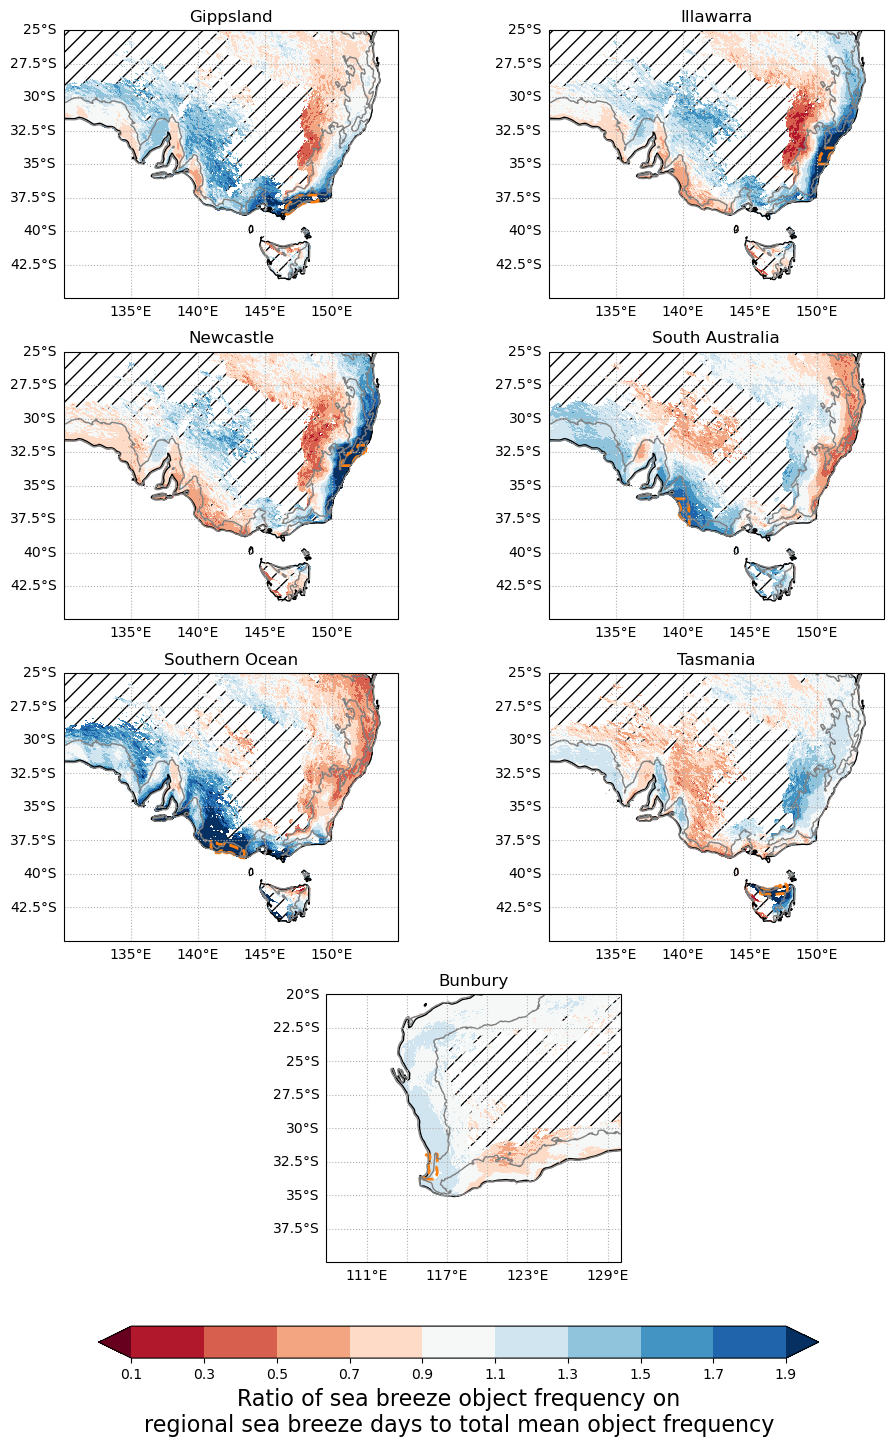

In [18]:
import cartopy.crs as ccrs

season="DJF"
min_freq = 0.01

def plot(sb_day_aest_mean,ratio,season,ax,shape,lsm,lat_slice=slice(-45,-25),lon_slice=slice(130,155),min_freq=0.015,title=""):
    
    c=xr.where(
        sb_day_aest_mean[season] > min_freq,
        ratio[season],
        np.nan).sel(lat=lat_slice,lon=lon_slice).plot(vmin=0,vmax=2,cmap="RdBu",levels=np.arange(0.1,2,0.2),extend="both",add_colorbar=False)
    xr.plot.contour(shape.sel(lat=lat_slice,lon=lon_slice),levels=1,colors="tab:orange",linestyles="--",linewidths=2)
    xr.plot.contour(sb_day_aest_mean[season].sel(lat=lat_slice,lon=lon_slice),levels=[0.05],colors="grey",linewidths=1)

    xr.plot.contourf((sb_day_aest_mean[season].sel(lat=lat_slice,lon=lon_slice) < min_freq) * lsm.sel(lat=lat_slice,lon=lon_slice), 
                     levels=[0.5,1], hatches=["","//"],colors="none",add_colorbar=False)

    plt.title(title)

    return c

plt.figure(figsize=[12,16])

ax=plt.subplot2grid((4,4),(0,0),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,ratio_gipps,"DJF",ax,shapes["gipps"],shapes["lsm"],title="Gippsland")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])



ax=plt.subplot2grid((4,4),(0,2),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,ratio_illawarra,"DJF",ax,shapes["illawara"],shapes["lsm"],title="Illawarra")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])



ax=plt.subplot2grid((4,4),(1,0),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,ratio_newcastle,"DJF",ax,shapes["newcastle"],shapes["lsm"],title="Newcastle")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])



ax=plt.subplot2grid((4,4),(1,2),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,ratio_sa,"DJF",ax,shapes["sa"],shapes["lsm"],title="South Australia")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])



ax=plt.subplot2grid((4,4),(2,0),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,ratio_southern,"DJF",ax,shapes["southern"],shapes["lsm"],title="Southern Ocean")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])




ax=plt.subplot2grid((4,4),(2,2),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,ratio_tas,"DJF",ax,shapes["tas"],shapes["lsm"],title="Tasmania")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])


ax=plt.subplot2grid((4,4),(3,1),rowspan=1,colspan=2,projection=ccrs.PlateCarree())
c=plot(sb_day_awst_mean,ratio_bunbury,"DJF",ax,shapes["bunbury"],shapes["lsm"],lon_slice=slice(108,130),lat_slice=slice(-40,-20),title="Bunbury")
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])


cb=plt.colorbar(c, cax=plt.axes([0.2,0.05,0.6,0.02]),orientation="horizontal")
cb.set_label("Ratio of sea breeze object frequency on\nregional sea breeze days to total mean object frequency",size=16)

In [18]:
df = pd.read_table("https://psl.noaa.gov/data/correlation/nina34.anom.data",names=np.arange(0,13,1),\
    index_col=0,sep="  ",skiprows=[0,1,2],skipfooter=3,engine="python")
df.iloc[-1,7:] = np.nan
df = df.astype(float)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1950,-1.99,-1.69,-1.42,-1.54,-1.75,-1.27,-1.01,-0.97,-0.98,-1.03,-1.23,-1.31
1951,-1.30,-1.04,-0.38,-0.23,-0.01,0.00,0.30,0.17,0.51,0.49,0.55,0.31
1952,0.13,-0.01,-0.11,-0.02,-0.14,-0.54,-0.76,-0.56,-0.36,-0.46,-0.78,-0.39
1953,0.20,0.24,0.29,0.22,0.35,0.39,0.14,0.09,0.29,0.16,0.18,0.41
1954,0.43,0.28,-0.38,-1.17,-0.81,-0.93,-1.18,-1.43,-1.60,-1.48,-1.13,-1.33
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,-1.00,-1.00,-0.80,-0.72,-0.46,-0.28,-0.39,-0.53,-0.55,-0.94,-0.94,-1.06
2022,-0.94,-0.89,-0.97,-1.11,-1.11,-0.75,-0.69,-0.97,-1.07,-0.99,-0.90,-0.85
2023,-0.72,-0.46,-0.11,0.14,0.46,0.84,1.02,1.35,1.60,1.72,2.02,2.03


In [19]:
vals = []
date = []
for y in df.index:
    for m in df.columns:
        vals.append(df.loc[y,m])
        date.append(pd.to_datetime(str(y)+"-"+str(m)+"-01"))

In [20]:
df_ts = pd.DataFrame({"nino34":vals},index=date)

df_ts = df_ts.rolling(3,center=True).mean().loc[slice("1979-01-01","2024-12-31")]

In [21]:
nino_months = pd.to_datetime(df_ts[(df_ts > 0.8)].dropna().index)
nina_months = pd.to_datetime(df_ts[(df_ts < -0.8)].dropna().index)

In [22]:
sb_day_months = pd.to_datetime([t.replace(day=1) for t in pd.to_datetime(sb_day_aest.time)])

NameError: name 'sb_day_aest' is not defined

In [26]:
nino_mean = []

for season in ["DJF","MAM","JJA","SON"]:
    nino_mean.append(
        sb_day_aest.sel(
            time=(np.in1d(sb_day_months,nino_months)) & (np.in1d(sb_day_aest.time.dt.season,season)))
        .mask.mean("time").persist())
    
nino_mean = xr.Dataset({"DJF":nino_mean[0],"MAM":nino_mean[1],"JJA":nino_mean[2],"SON":nino_mean[3]})



In [27]:
nina_mean = []

for season in ["DJF","MAM","JJA","SON"]:
    nina_mean.append(
        sb_day_aest.sel(
            time=(np.in1d(sb_day_months,nina_months)) & (np.in1d(sb_day_aest.time.dt.season,season)))
        .mask.mean("time").persist())
    
nina_mean = xr.Dataset({"DJF":nina_mean[0],"MAM":nina_mean[1],"JJA":nina_mean[2],"SON":nina_mean[3]})

array([-0.055, -0.045, -0.035, -0.025, -0.015, -0.005,  0.005,  0.015,
        0.025,  0.035,  0.045,  0.055])

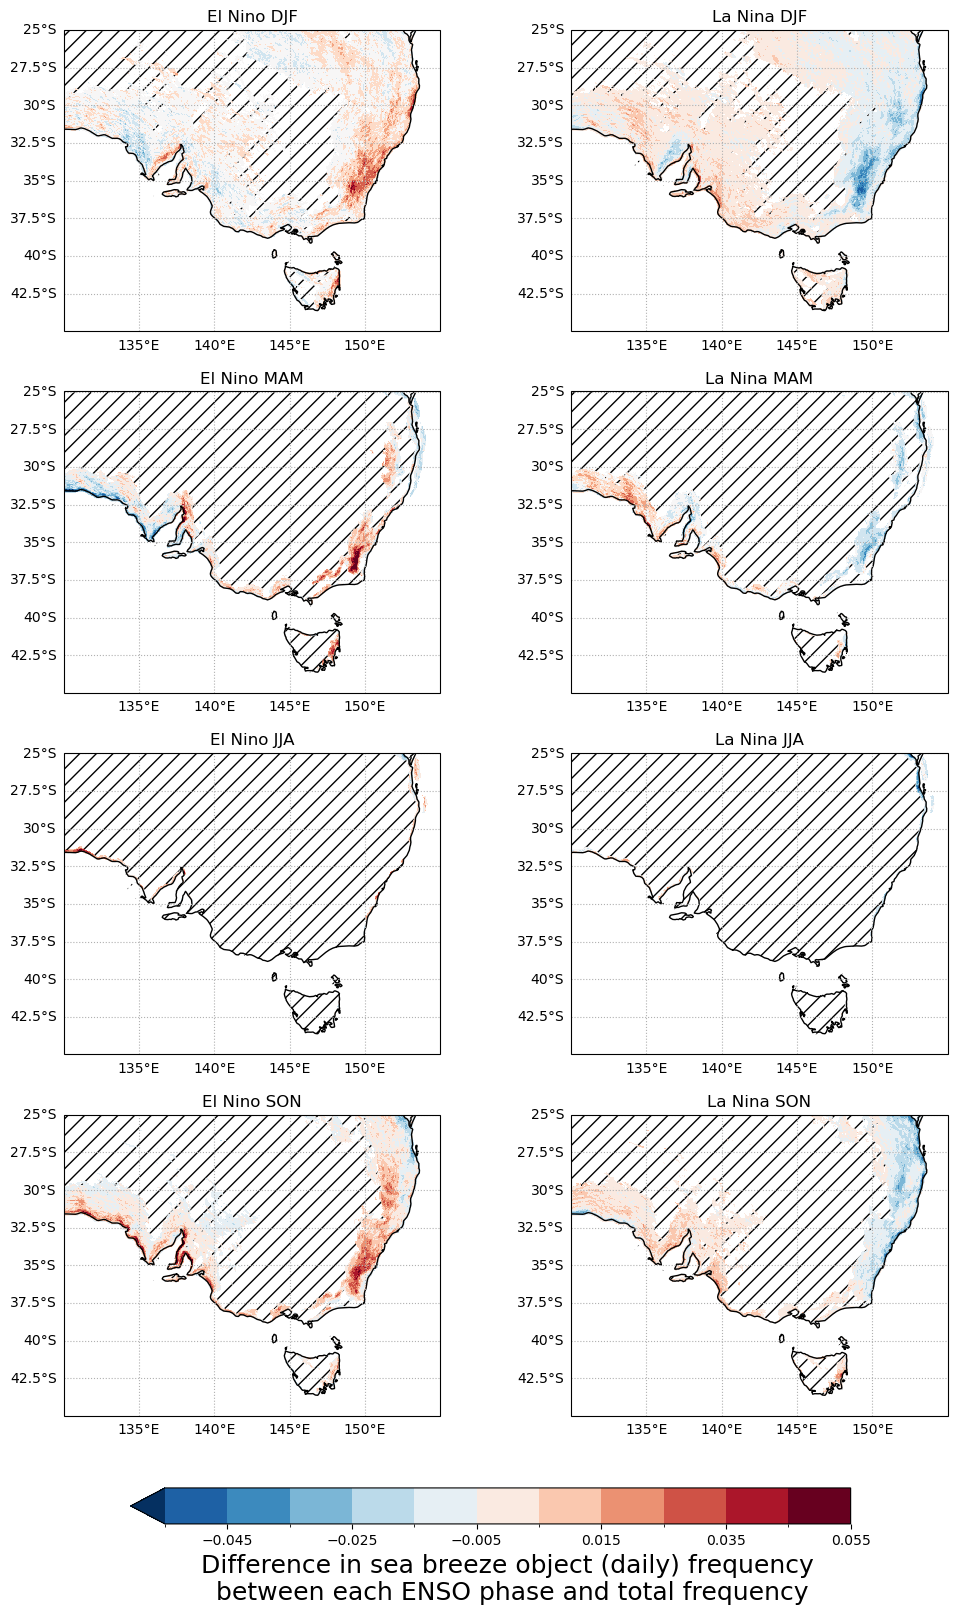

In [55]:

def plot(sb_day_aest_mean,enso_mean,season,ax,lsm,min_freq=0.015,lat_slice=slice(-45,-25),lon_slice=slice(130,155),title=""):

    c=xr.where(
        sb_day_aest_mean[season] >= min_freq,
        (enso_mean[season] - sb_day_aest_mean[season]),
        np.nan).sel(lat=lat_slice,lon=lon_slice).plot(levels=np.arange(-0.055,0.065,0.01),add_colorbar=False)
    xr.plot.contourf((sb_day_aest_mean[season].sel(lat=lat_slice,lon=lon_slice) < min_freq) * lsm.sel(lat=lat_slice,lon=lon_slice), 
                     levels=[0.5,1], hatches=["","//"],colors="none",add_colorbar=False)
    ax.coastlines()
    ax.gridlines(ls=":",draw_labels=["left","bottom"])
    plt.title(title)
    return c


plt.figure(figsize=[12,18])

season="DJF"

ax=plt.subplot(4,2,1,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nino_mean,season,ax,shapes["lsm"],title="El Nino "+season)

ax=plt.subplot(4,2,2,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nina_mean,season,ax,shapes["lsm"],title="La Nina "+season)


season="MAM"

ax=plt.subplot(4,2,3,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nino_mean,season,ax,shapes["lsm"],title="El Nino "+season)

ax=plt.subplot(4,2,4,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nina_mean,season,ax,shapes["lsm"],title="La Nina "+season)


season="JJA"

ax=plt.subplot(4,2,5,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nino_mean,season,ax,shapes["lsm"],title="El Nino "+season)

ax=plt.subplot(4,2,6,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nina_mean,season,ax,shapes["lsm"],title="La Nina "+season)



season="SON"

ax=plt.subplot(4,2,7,projection=ccrs.PlateCarree())
plot(sb_day_aest_mean,nino_mean,season,ax,shapes["lsm"],title="El Nino "+season)

ax=plt.subplot(4,2,8,projection=ccrs.PlateCarree())
c=plot(sb_day_aest_mean,nina_mean,season,ax,shapes["lsm"],title="La Nina "+season)

cb=plt.colorbar(c,cax=plt.axes([0.2,0.05,0.6,0.02]),orientation="horizontal")
cb.set_label("Difference in sea breeze object (daily) frequency\n between each ENSO phase and total frequency",size=18)

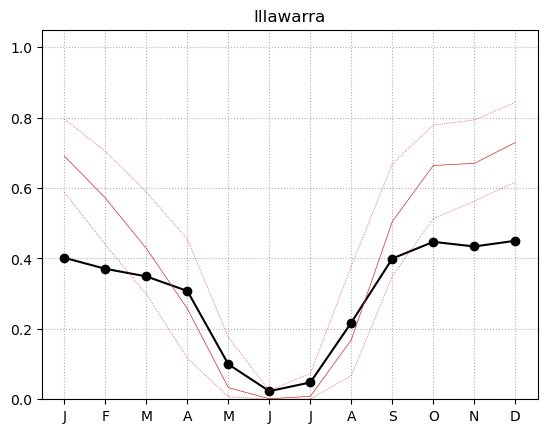

In [9]:
def plot(ax,df,df2,title):

    l1=(df[df["sb"]==1].index.month.value_counts().sort_index() / \
         df.index.month.value_counts().sort_index()).plot(color="k",marker="o",ax=ax,legend=False)

    l2=(df2 > 0).groupby(pd.to_datetime(df2.index).month).mean().plot(color="tab:red",lw=0.5,ls=":",ax=ax,legend=False)
    l3=(df2 > 1).groupby(pd.to_datetime(df2.index).month).mean().plot(color="tab:red",lw=0.5,ls="-",ax=ax,legend=False)
    l4=(df2 > 2).groupby(pd.to_datetime(df2.index).month).mean().plot(color="tab:red",lw=0.5,ls=":",ax=ax,legend=False)
    ax.set_ylim([0,1.05])
    
    #ax.set_ylim([0,0.9])
    ax.set_title(title)
    ax.grid(ls=":")
    ax.set_xlabel("")
    ax.set_xticks(np.arange(1,13),["J","F","M","A","M","J","J","A","S","O","N","D"])

    #ax2 = ax.twinx()
    #df2.groupby(pd.to_datetime(df2.index).month).mean().plot(ax=ax2,color="tab:red",lw=0.5)
    #ax2.set_ylim([-2.5,8.5])

    return l1,l2,l3,l4

    
    

plot(plt.axes(),illawara,land_sea_diff_illawara,"Illawarra");

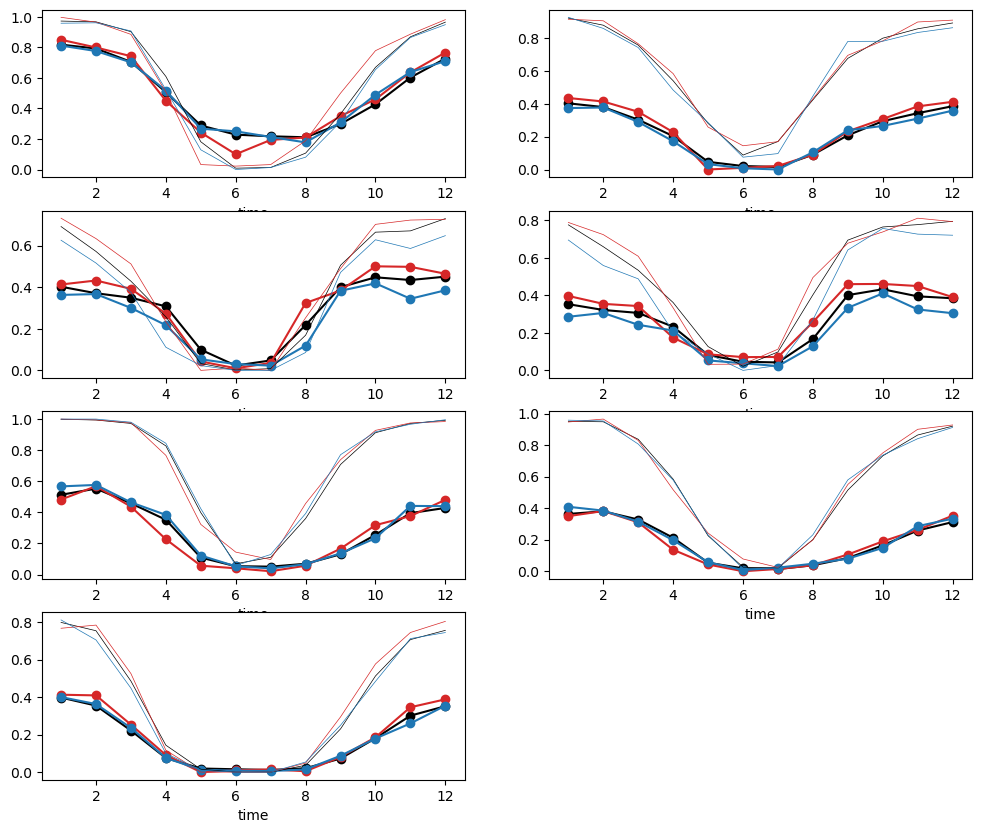

In [60]:
def plot_enso_land_sea_diff(df, nino_months, nina_months, ax):

    df_months = pd.to_datetime([t.replace(day=1) for t in pd.to_datetime(df.index)])
    
    df_nino = df[np.in1d(df_months,nino_months)]
    df_nina = df[np.in1d(df_months,nina_months)]
    
    #df.groupby(df.index.month).mean().plot(color="k",marker="o",ax=ax)
    #df_nino.groupby(df_nino.index.month).mean().plot(color="tab:red",marker="o",ax=ax)
    #df_nina.groupby(df_nina.index.month).mean().plot(color="tab:blue",marker="o",ax=ax)

    (df > 1).groupby(pd.to_datetime(df.index).month).mean().plot(color="k",marker="none",ax=ax,lw=0.5,legend=False)
    (df_nino > 1).groupby(pd.to_datetime(df_nino.index).month).mean().plot(color="tab:red",marker="none",ax=ax,lw=0.5,legend=False)
    (df_nina > 1).groupby(pd.to_datetime(df_nina.index).month).mean().plot(color="tab:blue",marker="none",ax=ax,lw=0.5,legend=False)



def plot_enso_diff(df, nino_months, nina_months, ax):

    df_months = pd.to_datetime([t.replace(day=1) for t in pd.to_datetime(df.index)])
    
    df_nino = df[np.in1d(df_months,nino_months)]
    df_nina = df[np.in1d(df_months,nina_months)]
    
    df.groupby(df.index.month).mean().plot(color="k",marker="o",ax=ax,legend=False)
    df_nino.groupby(df_nino.index.month).mean().plot(color="tab:red",marker="o",ax=ax,legend=False)
    df_nina.groupby(df_nina.index.month).mean().plot(color="tab:blue",marker="o",ax=ax,legend=False)

fig=plt.figure(figsize=[12,10])

ax=plt.subplot(4,2,1)
plot_enso_diff(bunbury, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_bunbury, nino_months, nina_months, ax)

ax=plt.subplot(4,2,2)
plot_enso_diff(gipps, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_gipps, nino_months, nina_months, ax)

ax=plt.subplot(4,2,3)
plot_enso_diff(illawara, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_illawara, nino_months, nina_months, ax)

ax=plt.subplot(4,2,4)
plot_enso_diff(newcastle, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_newcastle, nino_months, nina_months, ax)

ax=plt.subplot(4,2,5)
plot_enso_diff(sa, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_sa, nino_months, nina_months, ax)

ax=plt.subplot(4,2,6)
plot_enso_diff(southern, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_southern, nino_months, nina_months, ax)

ax=plt.subplot(4,2,7)
plot_enso_diff(tas, nino_months, nina_months, ax)
plot_enso_land_sea_diff(land_sea_diff_tas, nino_months, nina_months, ax)


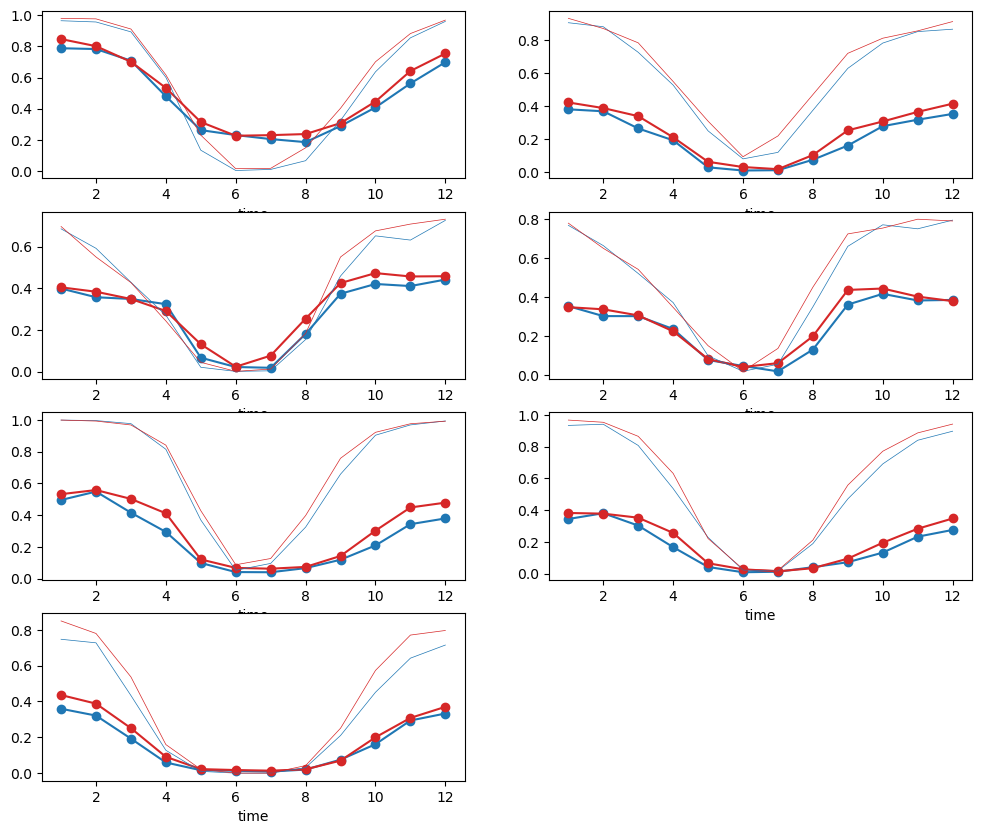

In [70]:
def plot_period_land_sea_diff(df, t1_slice, t2_slice, ax):

    df_months = pd.to_datetime([t.replace(day=1) for t in pd.to_datetime(df.index)])
    
    df_p1 = df.loc[t1_slice]
    df_p2 = df.loc[t2_slice]
    
    (df_p1 > 1).groupby(pd.to_datetime(df_p1.index).month).mean().plot(color="tab:blue",marker="none",ax=ax,lw=0.5,legend=False)
    (df_p2 > 1).groupby(pd.to_datetime(df_p2.index).month).mean().plot(color="tab:red",marker="none",ax=ax,lw=0.5,legend=False)


def plot_period_diff(df, t1_slice, t2_slice, ax):

    df_months = pd.to_datetime([t.replace(day=1) for t in pd.to_datetime(df.index)])
    
    df_p1 = df.loc[t1_slice]
    df_p2 = df.loc[t2_slice]
    
    df_p1.groupby(df_p1.index.month).mean().plot(color="tab:blue",marker="o",ax=ax,legend=False)
    df_p2.groupby(df_p2.index.month).mean().plot(color="tab:red",marker="o",ax=ax,legend=False)

fig=plt.figure(figsize=[12,10])

ax=plt.subplot(4,2,1)
plot_period_diff(bunbury, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_bunbury, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)

ax=plt.subplot(4,2,2)
plot_period_diff(gipps, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_gipps, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)

ax=plt.subplot(4,2,3)
plot_period_diff(illawara, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_illawara, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)

ax=plt.subplot(4,2,4)
plot_period_diff(newcastle, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_newcastle, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)

ax=plt.subplot(4,2,5)
plot_period_diff(sa, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_sa, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)

ax=plt.subplot(4,2,6)
plot_period_diff(southern, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_southern, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)

ax=plt.subplot(4,2,7)
plot_period_diff(tas, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)
plot_period_land_sea_diff(land_sea_diff_tas, slice("1979-01-01","2001-12-31 23:00"), slice("2002-01-01","2024-12-31 23:00"), ax)